<a href="https://colab.research.google.com/github/Erikearias/trabajoFinalFundamentosProgramacion/blob/master/Proyecto_de_Grado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

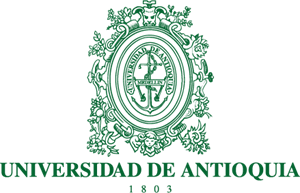

##**Universidad de Antioquia**

**Especialización en Analítica y Ciencia de Datos**

**Erik Estiven Arias Paniagua**

**Anderson Guisao Padrón**

##**Librerias**

In [465]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (mean_absolute_error,
                             r2_score,
                             root_mean_squared_error)
#from sktime.performance_metrics.forecasting import mean_absolute_scaled_error

#Factor de Inflación de la Varianza VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Función para graficar atributos en barras, pair plot o box-plot
def multiple_plot(ncols, data, columns, target_var, plot_type, title, rot):
    '''
    Returns the figure build from input parameters.

        Parameters:
            ncols       [integer]    Number of columns for subplots.
            data        [dataframe]  Features dataframe.
            columns     [list]       List of names of featutes in dataframe to plot.
            target_var  [string]     Name of column of target variable or feature.
            plot_type   [string]     Name of graphic. [countplot, boxplt or scatterplot]
            title       [string]     Title for figure
            rot         [integer]    Rotation angle for x axis labels
        Returns:
            Plot of figure

    Ejemplos:
        multiple_plot(1, d , None, 'bad_credit', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)
        multiple_plot(1, d , 'purpose', 'age_yrs', 'boxplot', 'Distribución de la variable próposito vs la edad',90)
        multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)
        multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)
        multiple_plot(3, d , catCols, 'age_yrs', 'boxplot', 'Distribución de la variables categóticas vs. la edad',30)
    '''


    # Paletas de colores y colores de las gráficas
    paletas = ['nipy_spectral','hsv','jet_r','Paired','Set2','Dark2','tab10','husl','mako']
    color = ['steelblue','forestgreen', 'amber']


    # Parámetros iniciales
    title_dist = 1.1  # Ajusta la distancia vertical del título en el gráfico
    x = -1            # Ubicación en el eje x del gráfico
    y =  0            # Ubicación en el eje y del gráfico
    nrows = 1         # Número inicial de filas


    # Ajustar el número de filas según el tipo de gráfico y la cantidad de columnas
    if isinstance(columns, list):
        nrows = math.ceil(len(columns) / ncols)

    # Crear el gráfico según el tipo especificado
    if ((nrows <= 1 and ncols <= 1) or plot_type == 'scatterplot'):

        # Countplot
        if plot_type == 'countplot':
            # Configurar el gráfico countplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.countplot(data=data,
                          x=target_var,
                          ax=axes,
                          palette=paletas[0],
                          zorder=1,
                          order=data[target_var].value_counts().index,
                          alpha=0.8
                          )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)

        # Boxplot
        elif plot_type == 'boxplot':
            # Configurar el gráfico boxplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.boxplot(data=data,
                        x=columns,
                        y=target_var,
                        ax=axes,
                        palette=paletas[0],
                        zorder=1
                        )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)


        # Scatterplot Matrix (Pairplot)
        elif plot_type == 'scatterplot':
            # Configurar el gráfico pairplot
            plot = sns.pairplot(data[columns],
                                palette=paletas[0],
                                diag_kws={'color': color[1]},
                                plot_kws={'color': color[0]},
                                diag_kind='kde'
                                )
            # Ajustar el tamaño del gráfico
            plot.fig.set_size_inches(12, 12)
            # Añadir un título al pairplot
            plot.fig.suptitle(title, fontsize=14, fontweight="bold")
            # Ajustar el diseño para evitar solapamientos
            plt.subplots_adjust(top=0.9)
            # Mostrar el gráfico
            plt.show()

    # Graficar más de un subplot
    else:
        # Crear subplots con el número especificado de filas y columnas
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, (nrows * 3) + 1))

        for i, column in enumerate(columns):
            x = x + 1

            # Reiniciar x e incrementar y si x alcanza el número de columnas
            if x >= ncols:
                y = y + 1
                x = 0

            # Configurar el subplot actual
            if nrows == 1:
                ax_cond = axes[i]
                title_dist = 1.1
            else:
                ax_cond = axes[y, x]

            # Crear el gráfico según el tipo especificado
            if plot_type == 'countplot':
                # Countplot
                sns.countplot(data=data,
                              x=column,
                              ax=ax_cond,
                              palette=paletas[0],
                              zorder=1,
                              edgecolor='black',
                              linewidth=0.5,
                              order=data[column].value_counts().index
                              )

            elif plot_type == 'boxplot':
                # Boxplot
                sns.boxplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],
                            zorder=1
                            )

            # Añadir cuadrícula en el eje y
            ax_cond.grid(axis='y', zorder=0)
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título del subplot
            ax_cond.set_title(column, fontsize=10)
            # Ajustar tamaño de las etiquetas
            ax_cond.tick_params(labelsize=8)
            # Limpiar etiquetas del eje x
            ax_cond.set_xlabel("")

        # Ajustar el diseño y el título general del conjunto de subplots
        fig.tight_layout()
        fig.suptitle(title, fontsize=14, fontweight="bold", y=title_dist - 0.15)
        plt.subplots_adjust(top=0.9)

        # Eliminar subplots sin datos si hay más de una fila
        if nrows > 1:
            for ax in axes.flat:
                if not bool(ax.has_data()):
                    fig.delaxes(ax)  # Eliminar si no hay datos en el subplot


# Funcion para imprimir la curva ROC
def plot_roc_curve(fpr, tpr):
    '''
    Funcion para imprimir la curva ROC
    '''
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Función para convertir una matriz de correlación de pandas en formato tidy
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

#Función para calcular VIF (Variance Inflation Factor):


def checkVIF(X):
    '''
    Se Utiliza VIF para solucionar la multicolinealidad. VIF indica el grado de indecencia de esa variable.
    Los valores de los umbrales típicos que se suelen utilizar son entre 5 y 10, siendo más exigentes los valores más bajos.
    '''
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

def identificar_outliers(df, numCols):
    """
    Identifica los índices de los valores outliers en un DataFrame para una lista de variables numéricas.

    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    numCols (list): Lista de nombres de las columnas numéricas a analizar.

    Retorna:
    list: Lista de índices de los valores outliers.
    """
    # Lista para almacenar los índices de los outliers
    outliers_indices = []

    for var in numCols:
        # Calcular el rango intercuartílico (IQR)
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites para identificar outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar los índices de los outliers
        outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)].index.tolist()

        # Agregar los índices a la lista de outliers
        outliers_indices.extend(outliers)

    return outliers_indices

def eval_model(model, X_train, y_train):
    """
    Permite evaluar el rendimiento de un modelo de regresión utilizando varias métricas.

    Parámetros:
    model (object): El modelo de regresión que se va a evaluar.
    X_train (array-like): Conjunto de características de entrenamiento.
    y_train (array-like): Valores reales de la variable objetivo para el conjunto de entrenamiento.

    Retorna:
    dict: Un diccionario que contiene las siguientes métricas de evaluación:
        - "mae": Error absoluto medio (Mean Absolute Error).
        - "rmse": Raíz del error cuadrático medio (Root Mean Squared Error).
        - "r2": Coeficiente de determinación (R²).
        - "mase": Error absoluto medio escalado (Mean Absolute Scaled Error).
    """
    y_pred = model.predict(X_train)

    metrics = {
        "mae": round(mean_absolute_error(y_train, y_pred), 5),
        "rmse": round(root_mean_squared_error(y_train, y_pred), 5),
        "r2": round(r2_score(y_train, y_pred), 5),
        "mase": round(mean_absolute_scaled_error(y_train, y_pred, y_train=y_train), 5)
    }

    return metrics

def plot_param_perf(x, y_data, title, x_label, y_label):
    """
    Grafica el rendimiento del modelo en función de un parámetro ajustado.

    Parámetros:
    x (iterable): Valores del parámetro ajustado.
    y_data (dict): Diccionario con las métricas de rendimiento para entrenamiento y prueba.
    title (str): Título del gráfico.
    x_label (str): Etiqueta del eje x.
    y_label (str): Etiqueta del eje y.
    """
    y_train = y_data["train"]
    y_test = y_data["test"]

    # Graficar las métricas de rendimiento para entrenamiento y prueba
    sns.lineplot(x=x, y=y_train, label="train")
    sns.lineplot(x=x, y=y_test, label="test")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


def search_param(base_model, X_train, y_train, X_test, y_test, base_params, search_param, search_range):
    """
    Busca el mejor valor para un parámetro específico del modelo, evaluando el rendimiento
    en términos de R² y MASE para los conjuntos de entrenamiento y prueba.

    Parámetros:
    base_model (object): El modelo base que se va a ajustar.
    X_train (array-like): Conjunto de características de entrenamiento.
    y_train (array-like): Valores reales de la variable objetivo para el conjunto de entrenamiento.
    X_test (array-like): Conjunto de características de prueba.
    y_test (array-like): Valores reales de la variable objetivo para el conjunto de prueba.
    base_params (dict): Parámetros base del modelo.
    search_param (str): El nombre del parámetro que se va a ajustar.
    search_range (iterable): Rango de valores para el parámetro que se va a buscar.

    Retorna:
    tuple: Dos diccionarios que contienen las métricas R² y MASE para los conjuntos de entrenamiento y prueba.
    """
    r2_train = []
    r2_test = []
    mase_train = []
    mase_test = []

    for param in search_range:

        # Actualizar los parámetros del modelo con el valor actual del parámetro en búsqueda
        model_params = base_params
        model_params[search_param] = param
        current_model = base_model.set_params(**model_params)

        print(f"Ajustando para {search_param}={param}")
        current_model.fit(X_train, y_train)

        # Guardar R² para entrenamiento y prueba
        r2_train.append(r2_score(y_train, current_model.predict(X_train)))
        r2_test.append(r2_score(y_test, current_model.predict(X_test)))

        # Guardar MASE para entrenamiento y prueba
        mase_train.append(
            mean_absolute_scaled_error(
                y_train, current_model.predict(X_train), y_train=y_train
            )
        )
        mase_test.append(
            mean_absolute_scaled_error(
                y_test, current_model.predict(X_test), y_train=y_test
            )
        )

    # Guardar métricas en diccionarios
    r2_scores = {"train": r2_train, "test": r2_test}
    mase_scores = {"train": mase_train, "test": mase_test}
    return r2_scores, mase_scores

In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [467]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math


# Preparación de datos
# ==============================================================================

from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Preprocesado y modelado
# ==============================================================================


#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



#Creación de modelo
from sklearn.linear_model import LogisticRegression


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#Creación de modelo
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Preprocesado y modelado
# ==============================================================================
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn import svm


#configuracion de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Preprocesado y modelado
# ==============================================================================

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#from sklearn.tree import export_graphviz
#from sklearn.tree import export_text


#configuracion de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



#**Carga del Dataset**

In [468]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [469]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto de Grado/Data_Analisis_Movilidad_U2Y.csv', encoding='latin1', sep=';', on_bad_lines='skip')


## **Visualización inicial del df**

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22947 entries, 0 to 22946
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Dni_Aseg_Anonymized                      22947 non-null  object 
 1   Asegurado_Id_Anonymized                  22947 non-null  object 
 2   Poliza_Certificado_Id_Anonymized         22947 non-null  object 
 3   Numero_Poliza_Anonymized                 22947 non-null  object 
 4   Placa_Vehiculo_Anonymized                22947 non-null  object 
 5   Edad_Cliente                             22947 non-null  int64  
 6   segmento_edad                            22947 non-null  object 
 7   Sexo_Cd                                  22947 non-null  object 
 8   Estado_Civil_Desc                        22947 non-null  object 
 9   Ciudad_Cliente                           22947 non-null  object 
 10  Departamento_Cliente                     22947

In [471]:
# Crear resumen estadístico
resumen_estadistico = df.describe().T

# Agregar columnas de valores nulos y únicos
resumen_estadistico["nulls"] = df.isnull().sum()
resumen_estadistico["unique"] = df.nunique()

# Reordenar columnas
resumen_estadistico = resumen_estadistico[
    ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'nulls', 'unique']
]

styled_summary = (
    resumen_estadistico.style
    .format("{:.2f}", na_rep="NaN")  # Formato decimal
    .background_gradient(cmap='Blues', subset=['mean', 'std'])  # Color para medias y desviaciones
    .background_gradient(cmap='Reds', subset=['nulls'])         # Color para valores nulos
    .highlight_max(color='lightgreen', axis=0)                  # Resaltar máximos
    .highlight_min(color='lightcoral', axis=0)                  # Resaltar mínimos
    .set_caption("📊 Resumen Estadístico del DataFrame")
    .set_table_styles([{'selector': 'caption', 'props': [('font-size', '16px'), ('text-align', 'center')]}])
)


styled_summary


,count,mean,std,min,25%,50%,75%,max,nulls,unique
Edad_Cliente,22947.00,38.80,14.17,-1.00,29.00,36.00,47.00,98.00,0.00,91.00
Num_Total_Polizas_Cliente_CanalDD,22947.00,1.35,2.06,1.00,1.00,1.00,1.00,46.00,0.00,11.00
Modelo_Vehiculo,22947.00,2.02,0.01,1.96,2.02,2.02,2.02,2.03,0.00,54.00
Num_Total_Asistencias_Certificado,22947.00,0.57,1.62,0.00,0.00,0.00,0.00,30.00,0.00,27.00
Cliente_Tiene_Soat_Activo,22947.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00,0.00,2.00
Cliente_Tiene_Hogar_Activo,22947.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00,0.00,2.00
Cliente_Tiene_MasVida_Activo,22947.00,0.01,0.11,0.00,0.00,0.00,0.00,1.00,0.00,2.00
Cliente_Tiene_Salud_Activo,22947.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00,0.00,2.00
Cliente_Tiene_Vida_Activo,22947.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00,0.00,2.00


## **Limpieza de datos**

In [472]:
# Lista de columnas con separadores de miles
columnas_con_puntos = ['Rango_Ingresos_Cliente', 'Linea_Vehiculo_Calculada', 'Margen_Tecnico_Total_Certificado', 'Antiguedad_Cliente_En_CanalDD_Anios',
                       'Valor_Accesorios_Certificado', 'Vigencia_Total_Poliza_Meses',  'Ultima_Prima_Anualizada_Cert', 'Valor_Comercial_Vehiculo',
                       'Valor_Accesorios_Vehiculo_Sia', 'Valor_Accesorio_Especial_Veh', 'Prima_Total_Devengada_Certificado', 'Siniestros_Total_Incurridos_Certificado',
                       'Costo_Total_Asistencias_Certificado', 'Margen_Bruto_Total_Certificado', 'Rango_Ingresos_Cliente']

for col in columnas_con_puntos:
    # Paso 1: Eliminar puntos y cambiar coma por punto decimal
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
    )

    # Paso 2: Intentar convertir a numérico (si aplica)
    df[col] = pd.to_numeric(df[col], errors='ignore')  # usa 'coerce' si quieres forzar la conversión

In [473]:
#reemplazar "?" por 0 en Valor_Accesorios_Vehiculo_Sia', 'Valor_Accesorio_Especial_Veh

cols = ['Valor_Accesorios_Vehiculo_Sia', 'Valor_Accesorio_Especial_Veh']

# Reemplazar "?" por 0 y convertir a numérico
for col in cols:
    df[col] = df[col].replace('?', 0)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [474]:
df["Edad_Cliente"] = pd.to_numeric(df["Edad_Cliente"], errors="coerce")

# Calcular la media solo con edades válidas (mayores o iguales a 18)
media_edad = df.loc[df["Edad_Cliente"] >= 18, "Edad_Cliente"].mean()

# Reemplazar edades menores a 18 y -1 por la media
df.loc[(df["Edad_Cliente"] < 18) | (df["Edad_Cliente"] == -1), "Edad_Cliente"] = media_edad


In [475]:
# Reemplazar "?" por NaN
df["segmento_edad"] = df["segmento_edad"].replace("?", np.nan)

# Calcular la moda (valor más frecuente)
moda_segmento = df["segmento_edad"].mode()[0]

# Reemplazar NaN (antes "?") con la moda
df["segmento_edad"] = df["segmento_edad"].fillna(moda_segmento)


In [476]:
# Eliminar filas donde Sexo_Cd sea igual a '-1'
df = df[~df["Sexo_Cd"].astype(str).str.strip().eq("-1")].copy()

In [477]:
# Columnas donde se debe eliminar 'Sin_Información'
columnas = ["Ciudad_Cliente", "Departamento_Cliente", "Sector_Economico_Cliente"]

# Eliminar filas que contengan 'Sin_Información' (con limpieza de espacios y mayúsculas)
for col in columnas:
    df = df[~df[col].astype(str).str.strip().str.lower().eq("sin_información")]

In [478]:
# Borrando columnas que no se emplearán
df.drop([
    'Asegurado_Id_Anonymized',
    'Poliza_Certificado_Id_Anonymized',
    'Numero_Poliza_Anonymized',
    'Placa_Vehiculo_Anonymized',
    'Nombre_Agente_Anonymized',
    'Sector_Economico_Cliente',
    'Rango_Ingresos_Cliente',
    'Estado_Civil_Desc'

    ], axis=1, inplace=True, errors='ignore')


In [479]:
columnas = ["Valor_Accesorios_Vehiculo_Sia", "Valor_Accesorio_Especial_Veh"]

# Reemplazar "?" por 0 y asegurar tipo numérico
for col in columnas:
    df[col] = df[col].replace("?", 0)
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [480]:
#Se eliminan planes que no aplicarán al análisis del dataset y que represetan menos del 1% del total de registros.

valores_a_eliminar = ['PLAN BICISURA', 'No Aplica', 'Plan Seguro Muévete Libre']

df = df[~df['Subproducto_Desc'].isin(valores_a_eliminar)]

In [481]:
# Lista de columnas a convertir
variables_binarias = [
    'Cliente_Tiene_Soat_Activo',
    'Cliente_Tiene_Hogar_Activo',
    'Cliente_Tiene_MasVida_Activo',
    'Cliente_Tiene_Salud_Activo',
    'Cliente_Tiene_Vida_Activo'
]

# Reemplazo de valores
df[variables_binarias] = df[variables_binarias].replace({0: 'No', 1: 'Sí'})



In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22523 entries, 0 to 22946
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Dni_Aseg_Anonymized                      22523 non-null  object 
 1   Edad_Cliente                             22523 non-null  float64
 2   segmento_edad                            22523 non-null  object 
 3   Sexo_Cd                                  22523 non-null  object 
 4   Ciudad_Cliente                           22523 non-null  object 
 5   Departamento_Cliente                     22523 non-null  object 
 6   Antiguedad_Cliente_En_CanalDD_Anios      22523 non-null  float64
 7   Num_Total_Polizas_Cliente_CanalDD        22523 non-null  int64  
 8   Fecha_Inicio_Primera_Vigencia            22523 non-null  object 
 9   Fecha_Fin_Efectiva_Poliza                22523 non-null  object 
 10  Vigencia_Total_Poliza_Meses              22523 non-

In [483]:
df.head()

,Dni_Aseg_Anonymized,Edad_Cliente,segmento_edad,Sexo_Cd,Ciudad_Cliente,Departamento_Cliente,Antiguedad_Cliente_En_CanalDD_Anios,Num_Total_Polizas_Cliente_CanalDD,Fecha_Inicio_Primera_Vigencia,Fecha_Fin_Efectiva_Poliza,...,Siniestros_Total_Incurridos_Certificado,Margen_Tecnico_Total_Certificado,Num_Total_Asistencias_Certificado,Costo_Total_Asistencias_Certificado,Margen_Bruto_Total_Certificado,Cliente_Tiene_Soat_Activo,Cliente_Tiene_Hogar_Activo,Cliente_Tiene_MasVida_Activo,Cliente_Tiene_Salud_Activo,Cliente_Tiene_Vida_Activo
0,B3-E6-9C-2F,32.0,Adulto Joven,M,BOGOTA D.C.,BOGOTA D.C.,1.29,1,24/01/2024,24/01/2026,...,0.0,1515983.37,0,0.0,1515983.37,No,No,No,No,No
1,B1-F5-6D-ED,44.0,Adulto Joven,M,BOGOTA D.C.,BOGOTA D.C.,1.84,2,3/07/2023,3/04/2024,...,0.0,2792757.25,0,0.0,2792757.25,No,No,No,No,No
3,4B-9F-35-F5,26.0,Joven,F,CALI,VALLE DEL CAUCA,1.10,1,1/04/2024,1/04/2026,...,0.0,1364309.40,0,0.0,1364309.40,No,No,No,No,No
4,CC-39-97-CF,23.0,Joven,M,MEDELLIN,ANTIOQUIA,1.59,1,3/10/2023,3/10/2025,...,0.0,1940297.55,2,64154.0,1876143.55,No,No,No,No,Sí
5,E9-50-91-19,39.0,Adulto Joven,M,BOGOTA D.C.,BOGOTA D.C.,1.26,1,3/02/2024,3/02/2026,...,0.0,4264860.95,0,0.0,4264860.95,No,No,No,No,Sí


In [484]:
df.shape

(22523, 37)

In [485]:
df.head()

,Dni_Aseg_Anonymized,Edad_Cliente,segmento_edad,Sexo_Cd,Ciudad_Cliente,Departamento_Cliente,Antiguedad_Cliente_En_CanalDD_Anios,Num_Total_Polizas_Cliente_CanalDD,Fecha_Inicio_Primera_Vigencia,Fecha_Fin_Efectiva_Poliza,...,Siniestros_Total_Incurridos_Certificado,Margen_Tecnico_Total_Certificado,Num_Total_Asistencias_Certificado,Costo_Total_Asistencias_Certificado,Margen_Bruto_Total_Certificado,Cliente_Tiene_Soat_Activo,Cliente_Tiene_Hogar_Activo,Cliente_Tiene_MasVida_Activo,Cliente_Tiene_Salud_Activo,Cliente_Tiene_Vida_Activo
0,B3-E6-9C-2F,32.0,Adulto Joven,M,BOGOTA D.C.,BOGOTA D.C.,1.29,1,24/01/2024,24/01/2026,...,0.0,1515983.37,0,0.0,1515983.37,No,No,No,No,No
1,B1-F5-6D-ED,44.0,Adulto Joven,M,BOGOTA D.C.,BOGOTA D.C.,1.84,2,3/07/2023,3/04/2024,...,0.0,2792757.25,0,0.0,2792757.25,No,No,No,No,No
3,4B-9F-35-F5,26.0,Joven,F,CALI,VALLE DEL CAUCA,1.10,1,1/04/2024,1/04/2026,...,0.0,1364309.40,0,0.0,1364309.40,No,No,No,No,No
4,CC-39-97-CF,23.0,Joven,M,MEDELLIN,ANTIOQUIA,1.59,1,3/10/2023,3/10/2025,...,0.0,1940297.55,2,64154.0,1876143.55,No,No,No,No,Sí
5,E9-50-91-19,39.0,Adulto Joven,M,BOGOTA D.C.,BOGOTA D.C.,1.26,1,3/02/2024,3/02/2026,...,0.0,4264860.95,0,0.0,4264860.95,No,No,No,No,Sí


## **Analisis Exploratorio**

In [486]:
#Lista de variables categóricas
catCols = df.select_dtypes(include = ["object", 'category']).columns.tolist()

df[catCols].head(2)

,Dni_Aseg_Anonymized,segmento_edad,Sexo_Cd,Ciudad_Cliente,Departamento_Cliente,Fecha_Inicio_Primera_Vigencia,Fecha_Fin_Efectiva_Poliza,Subproducto_Desc,Forma_Pago_Desc,Ultima_Prima_Anualizada_Cert,...,Gama_Alta_Calculada,Ciudad_Ubicacion_Vehiculo,Departamento_Ubicacion_Vehiculo,Tipo_Servicio_Vehiculo_Desc,Margen_Tecnico_Total_Certificado,Cliente_Tiene_Soat_Activo,Cliente_Tiene_Hogar_Activo,Cliente_Tiene_MasVida_Activo,Cliente_Tiene_Salud_Activo,Cliente_Tiene_Vida_Activo
0,B3-E6-9C-2F,Adulto Joven,M,BOGOTA D.C.,BOGOTA D.C.,24/01/2024,24/01/2026,PLAN MOTOS,Mensual,1173285.00,...,NO,BOGOTA D.C.,BOGOTA D.C.,Particular,1515983.37,No,No,No,No,No
1,B1-F5-6D-ED,Adulto Joven,M,BOGOTA D.C.,BOGOTA D.C.,3/07/2023,3/04/2024,PLAN UTILITARIOS Y PESADOS CLASICO,Mensual,4174966.00,...,SI,BARRANQUILLA,ATLANTICO,Publico especial,2792757.25,No,No,No,No,No


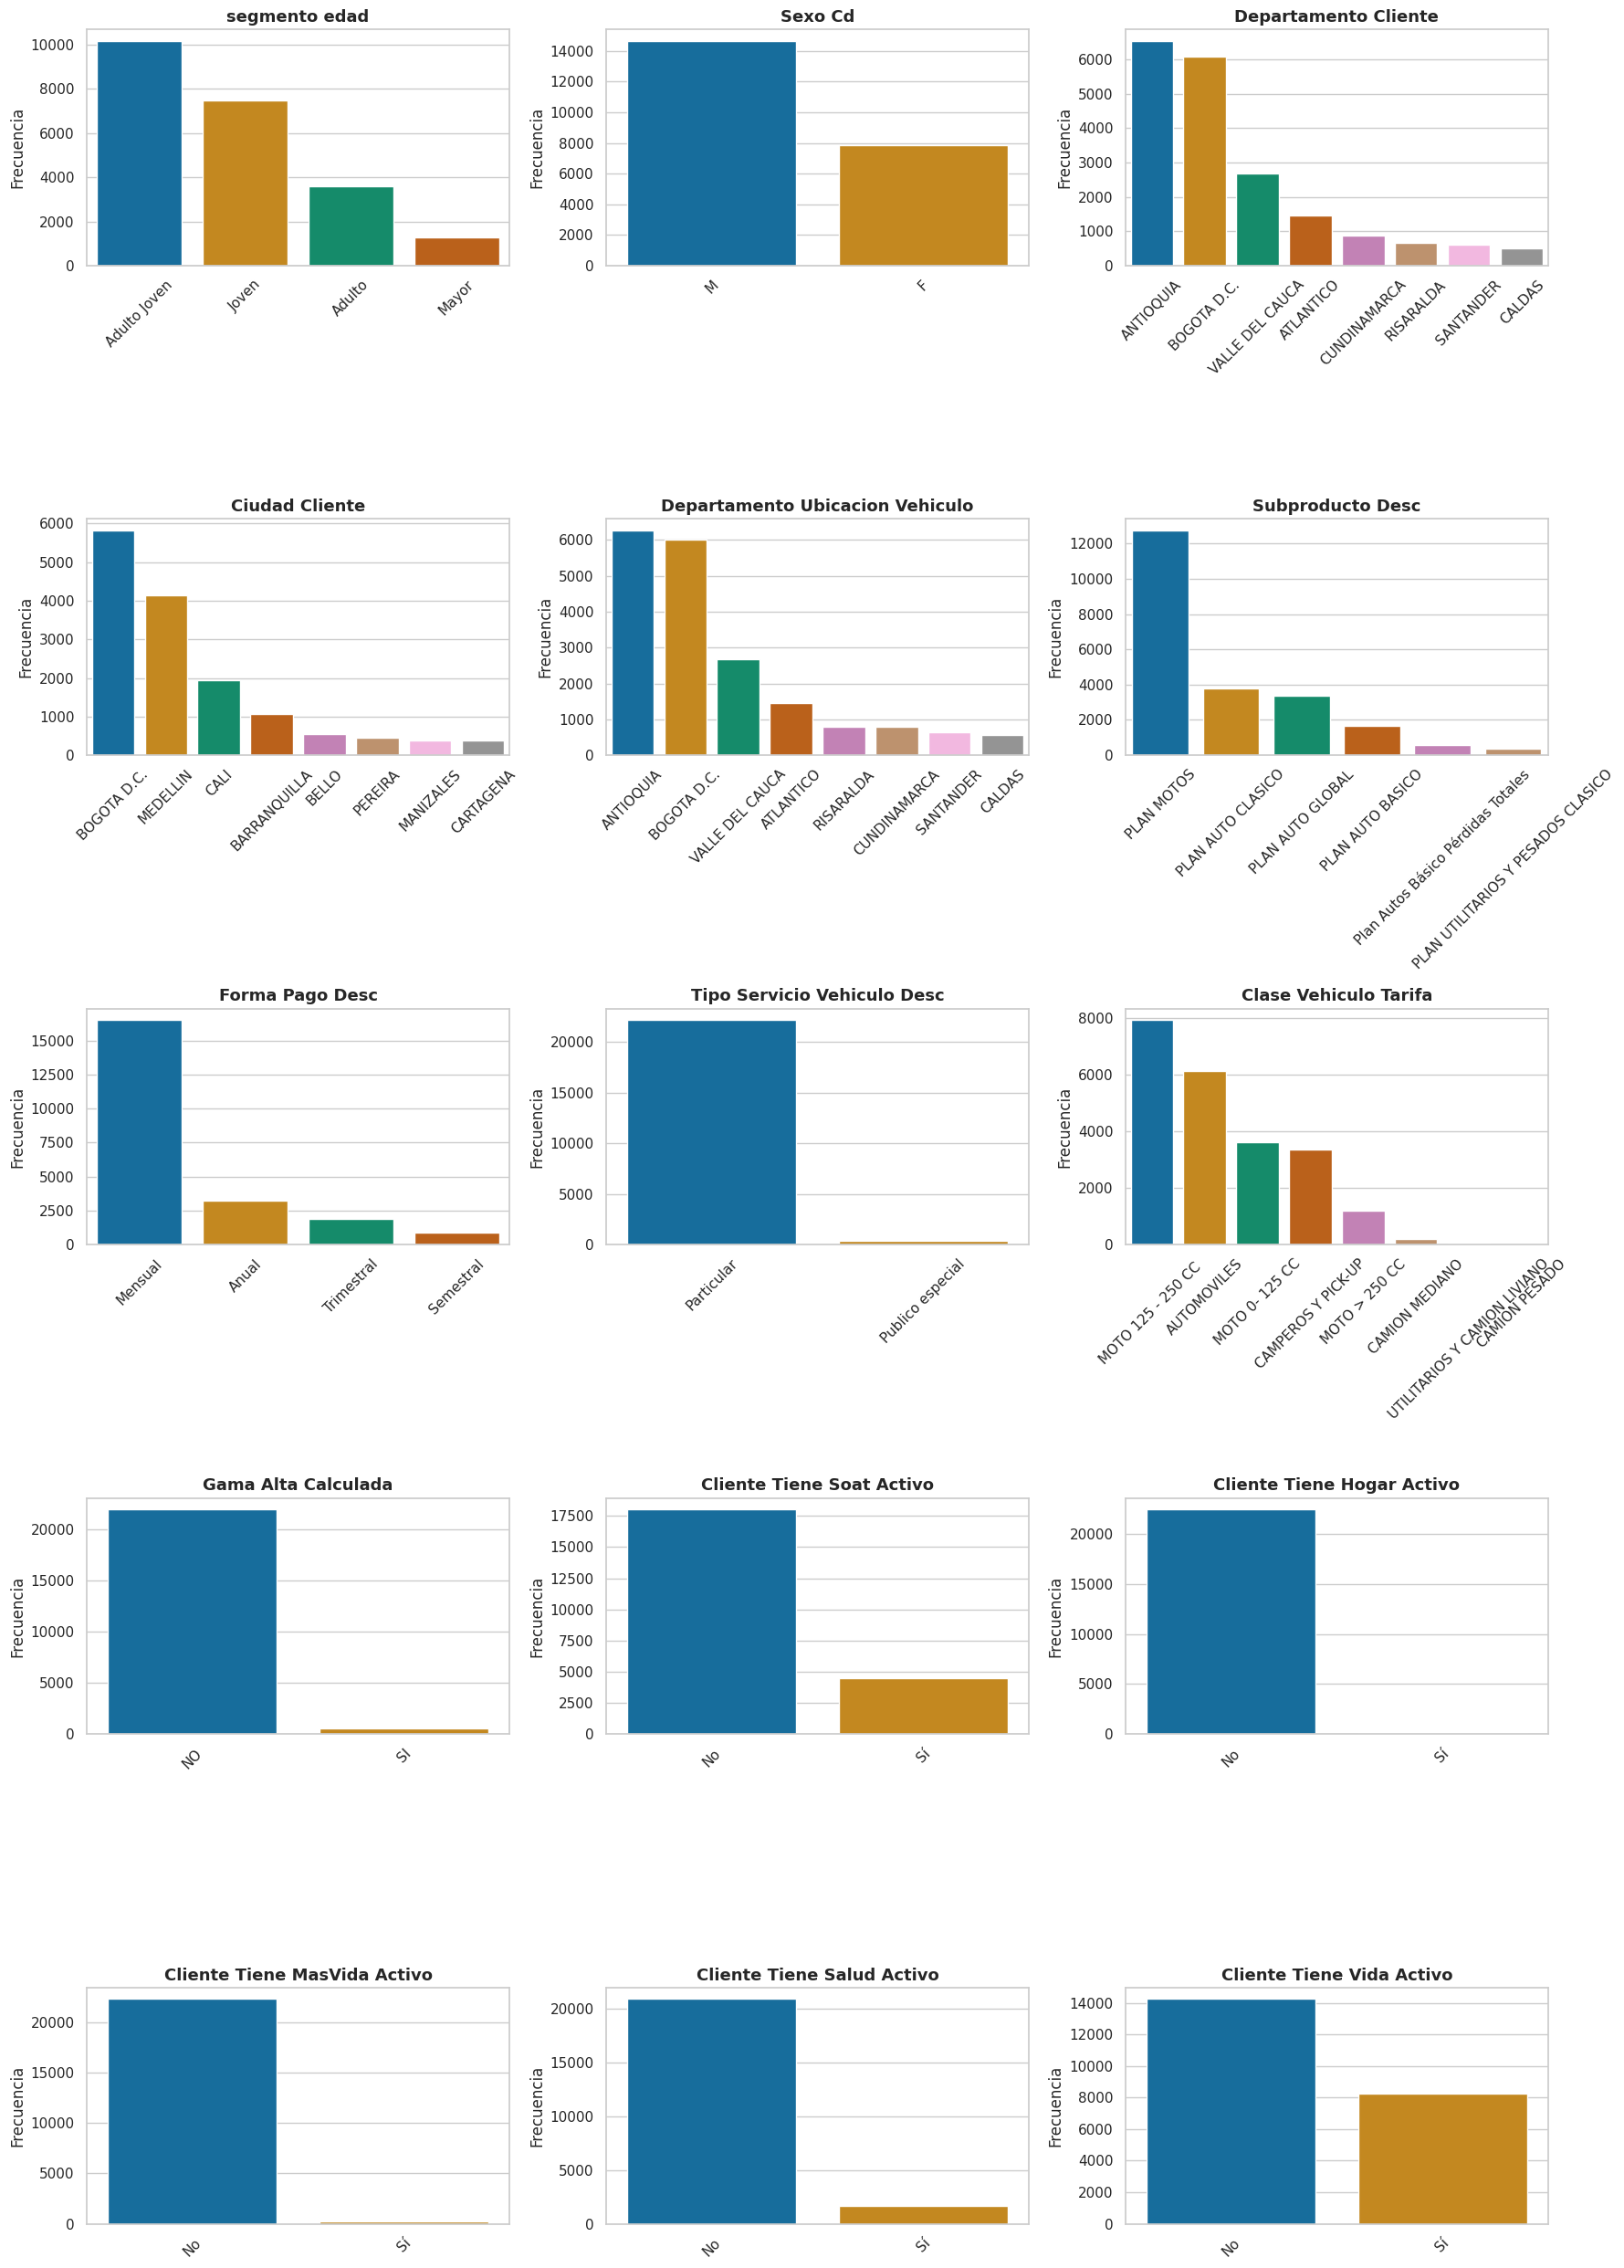

In [487]:
sns.set_theme(style="whitegrid", palette="colorblind")

# Variables categóricas relevantes
vars_relevantes = [
    'segmento_edad',
    'Sexo_Cd',
    'Departamento_Cliente',
    'Ciudad_Cliente',
    'Departamento_Ubicacion_Vehiculo',
    'Subproducto_Desc',
    'Forma_Pago_Desc',
    'Tipo_Servicio_Vehiculo_Desc',
    'Clase_Vehiculo_Tarifa',
    'Gama_Alta_Calculada',
    'Cliente_Tiene_Soat_Activo',
    'Cliente_Tiene_Hogar_Activo',
    'Cliente_Tiene_MasVida_Activo',
    'Cliente_Tiene_Salud_Activo',
    'Cliente_Tiene_Vida_Activo'
]

# Filtrar columnas que realmente existan
vars_relevantes = [col for col in vars_relevantes if col in df.columns]

# Layout dinámico
n_vars = len(vars_relevantes)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

# Crear subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Graficar cada variable categórica
for i, col in enumerate(vars_relevantes):
    ax = axes[i]
    data = df[col].dropna()

    # Obtener las 8 categorías más comunes
    top_categorias = data.value_counts().nlargest(8)

    # Crear gráfico
    sns.countplot(x=pd.Categorical(data, categories=top_categorias.index),
                  order=top_categorias.index,
                  ax=ax, palette="colorblind")

    # Título y estilo
    ax.set_title(col.replace('_', ' '), fontsize=13, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")
    ax.tick_params(axis='x', rotation=45)

# Ocultar subplots vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [488]:
#Lista de variables numéricas

numCols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

df[numCols].head(2)

,Edad_Cliente,Antiguedad_Cliente_En_CanalDD_Anios,Num_Total_Polizas_Cliente_CanalDD,Vigencia_Total_Poliza_Meses,Valor_Accesorios_Certificado,Modelo_Vehiculo,Valor_Comercial_Vehiculo,Valor_Accesorios_Vehiculo_Sia,Valor_Accesorio_Especial_Veh,Prima_Total_Devengada_Certificado,Siniestros_Total_Incurridos_Certificado,Num_Total_Asistencias_Certificado,Costo_Total_Asistencias_Certificado,Margen_Bruto_Total_Certificado
0,32.0,1.29,1,24.0,0.0,2.024,15000000.0,0.0,0.0,1515983.37,0.0,0,0.0,1515983.37
1,44.0,1.84,2,9.0,0.0,2.022,88400000.0,0.0,0.0,2792757.25,0.0,0,0.0,2792757.25


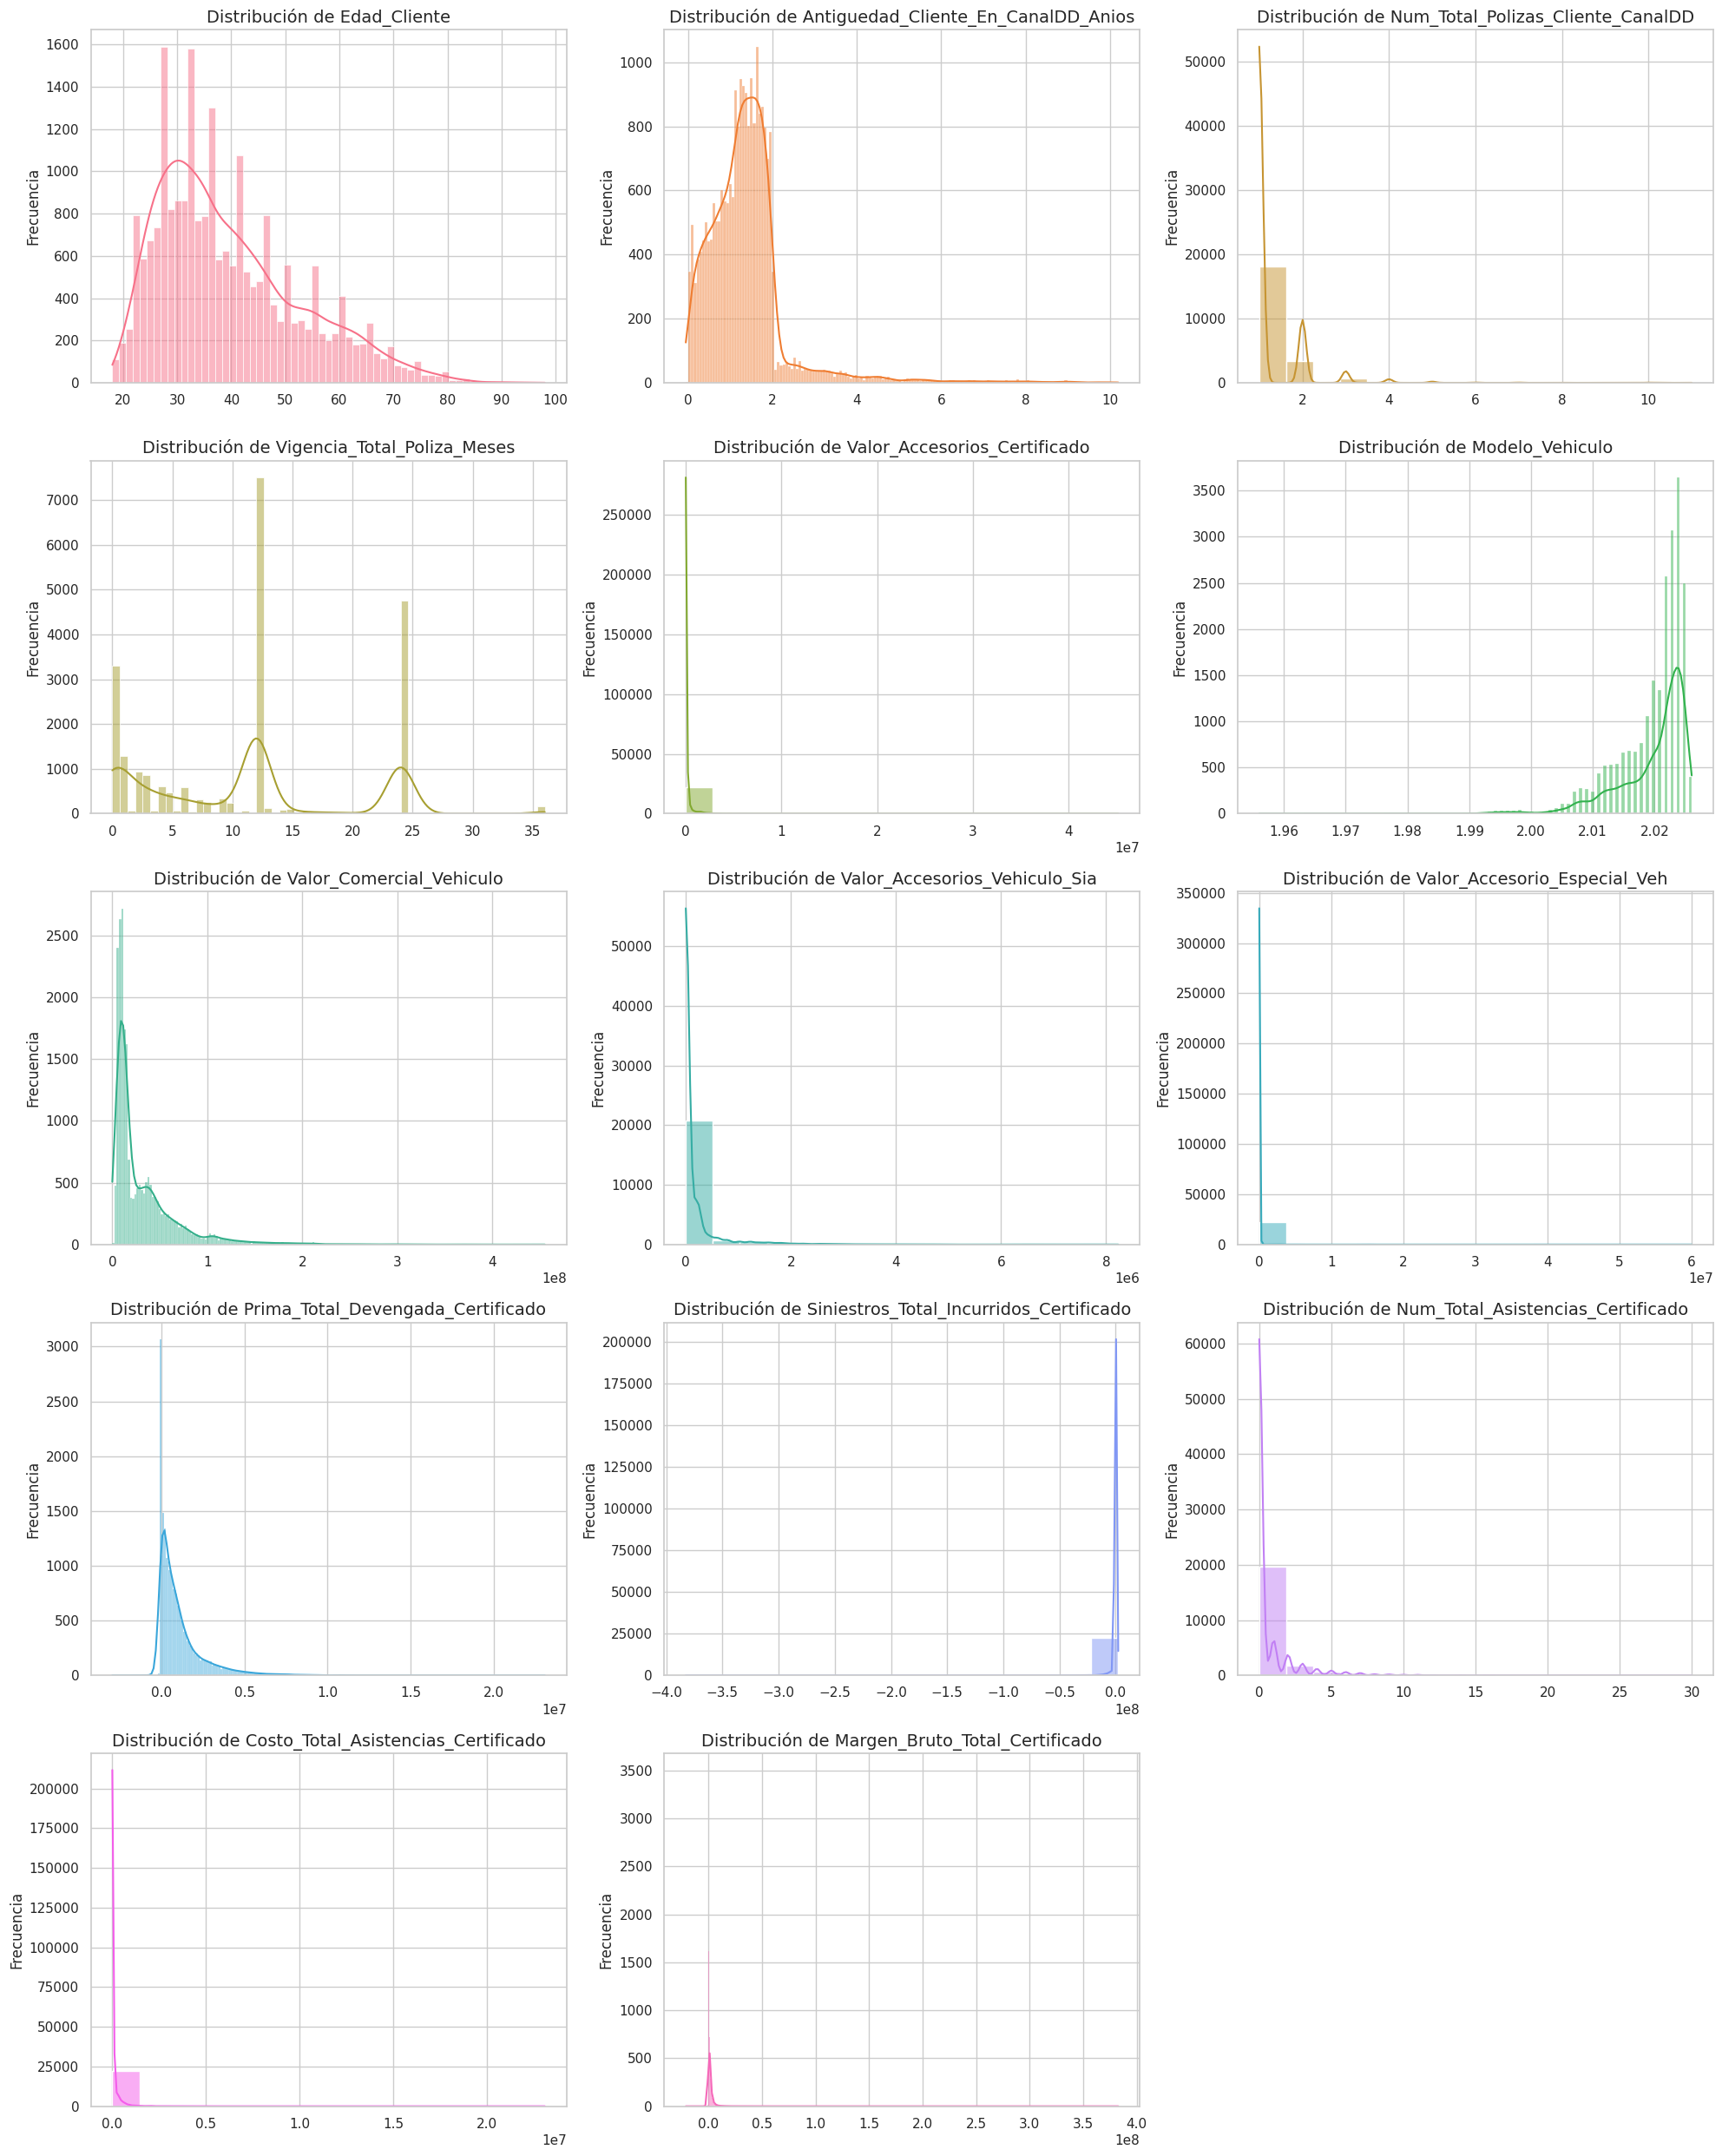

In [489]:
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Estilo visual
sns.set(style="whitegrid", palette="pastel")

# Configurar grilla: 3 columnas por fila
num_plots = len(numeric_cols)
cols = 3
rows = math.ceil(num_plots / cols)

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Graficar cada variable
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color=sns.color_palette("husl", len(numeric_cols))[i])
    axes[i].set_title(f'Distribución de {col}', fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


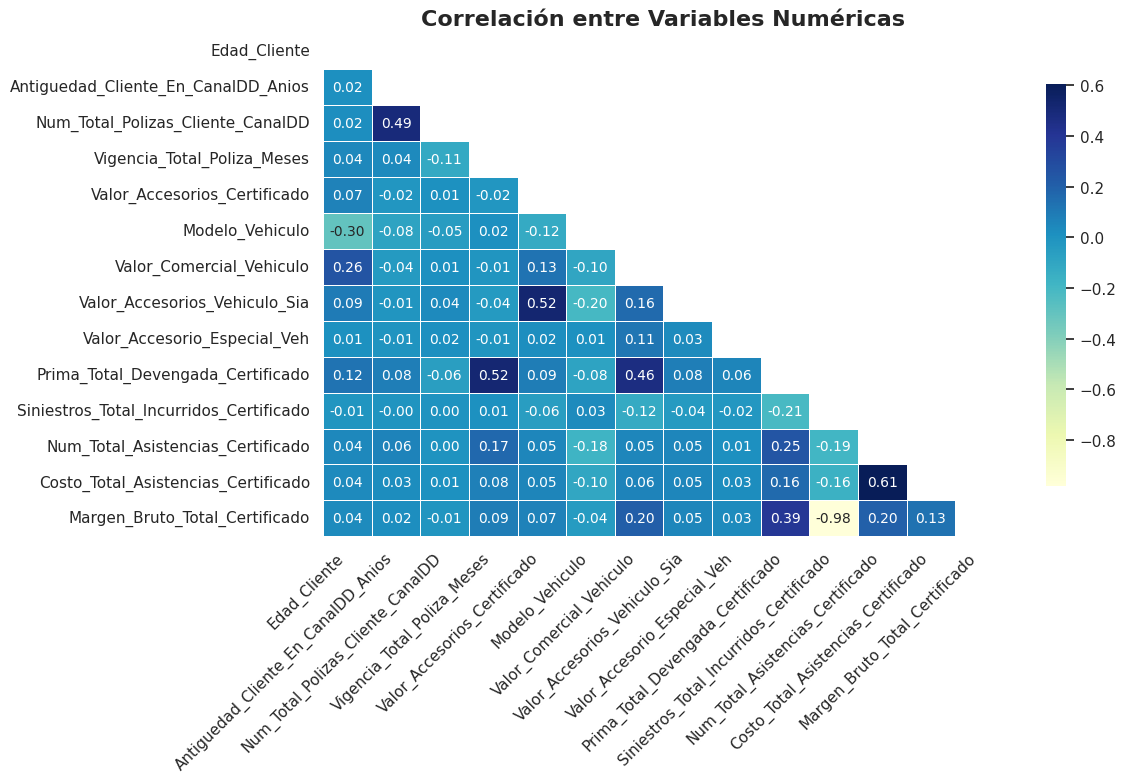

In [490]:
# Correlación entre variables númericas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr = numeric_df.corr()

# Crear máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.set(style="white")

# Crear mapa de calor
sns.heatmap(corr,
            mask=mask,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})

plt.title("Correlación entre Variables Numéricas", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Inclusión de columnas para el cálculo del CLV**

In [491]:
df['CAC_Promedio'] = np.where(df['Subproducto_Desc'].str.lower().str.contains('moto'), 70000, 300000)

In [492]:
df['Margen_Bruto_Total_Certificado'] = (
    pd.to_numeric(df['Margen_Bruto_Total_Certificado']
                  .astype(str)
                  .str.replace(r'[^\d\.-]', '', regex=True), errors='coerce')
)

df['CAC_Promedio'] = (
    pd.to_numeric(df['CAC_Promedio']
                  .astype(str)
                  .str.replace(r'[^\d\.-]', '', regex=True), errors='coerce')
)

# Agrupar por cliente
df_grouped = df.groupby('Dni_Aseg_Anonymized').agg(
    P_certificados_cliente=('Dni_Aseg_Anonymized', 'count'),
    Margen_Bruto_Total=('Margen_Bruto_Total_Certificado', 'sum'),
    CAC_Promedio=('CAC_Promedio', 'first')
).reset_index()

# Calcular CLV
df_grouped['CLV'] = df_grouped['Margen_Bruto_Total'] - df_grouped['CAC_Promedio']

# Tomar los primeros 10 sin ordenar
df_sample10 = df_grouped.head(10)

# Estilizar tabla
styled_table = (
    df_sample10.style
    .background_gradient(subset=['CLV'], cmap='Blues')
    .format({
        'Margen_Bruto_Total': '${:,.0f}',
        'CAC_Promedio': '${:,.0f}',
        'CLV': '${:,.0f}'
    })
    .set_caption("CLV Clientes")
)

styled_table


,Dni_Aseg_Anonymized,P_certificados_cliente,Margen_Bruto_Total,CAC_Promedio,CLV
0,00-03-D1-7F,1,"$51,194","$300,000","$-248,806"
1,00-06-40-11,1,"$1,587,213","$70,000","$1,517,213"
2,00-09-36-02,1,"$281,625","$70,000","$211,625"
3,00-0C-A5-FE,1,$1,"$70,000","$-69,999"
4,00-10-15-47,2,"$1,157,500","$70,000","$1,087,500"
5,00-14-37-0A,1,"$542,604","$300,000","$242,604"
6,00-18-17-01,1,"$178,126","$70,000","$108,126"
7,00-1A-AC-5F,1,"$2,702,060","$300,000","$2,402,060"
8,00-1B-C3-B2,1,"$180,450","$300,000","$-119,550"
9,00-1F-E4-83,1,"$307,012","$70,000","$237,012"


### Una vez validamos esta información de la variables númericas y categóricas, y de la inclusión de las 2 nuevas columnas, procedemos ahacer de nuevo la matriz de correlación

In [495]:
df_grouped['CLV'] = pd.to_numeric(df_grouped['Margen_Bruto_Total'], errors='coerce') - pd.to_numeric(df_grouped['CAC_Promedio'], errors='coerce')

# Unir la columna CLV al DataFrame df
df = df.merge(df_grouped[['Dni_Aseg_Anonymized', 'CLV']], on='Dni_Aseg_Anonymized', how='left')


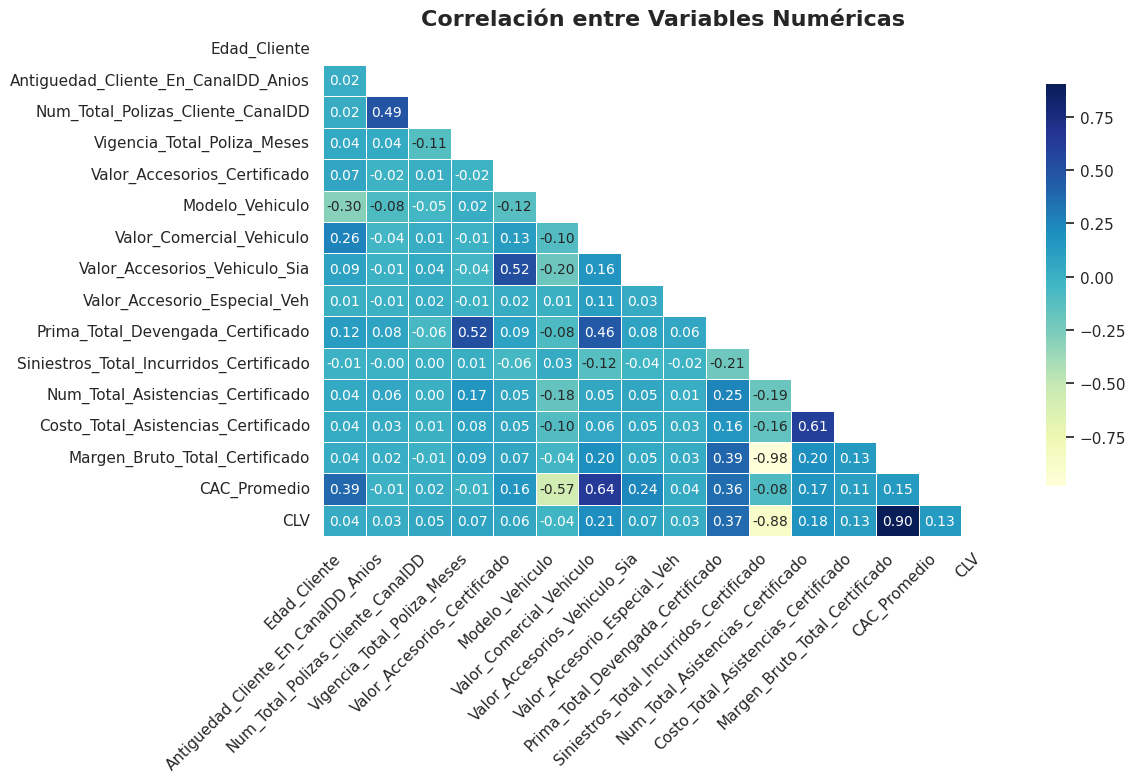

In [496]:
# Asegurar que CLV esté en df como valor numérico
df['CLV'] = pd.to_numeric(df['CLV'], errors='coerce')

# Seleccionar variables numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr = numeric_df.corr()

# Crear máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.set(style="white")

# Crear mapa de calor
sns.heatmap(corr,
            mask=mask,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})

plt.title("Correlación entre Variables Numéricas", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


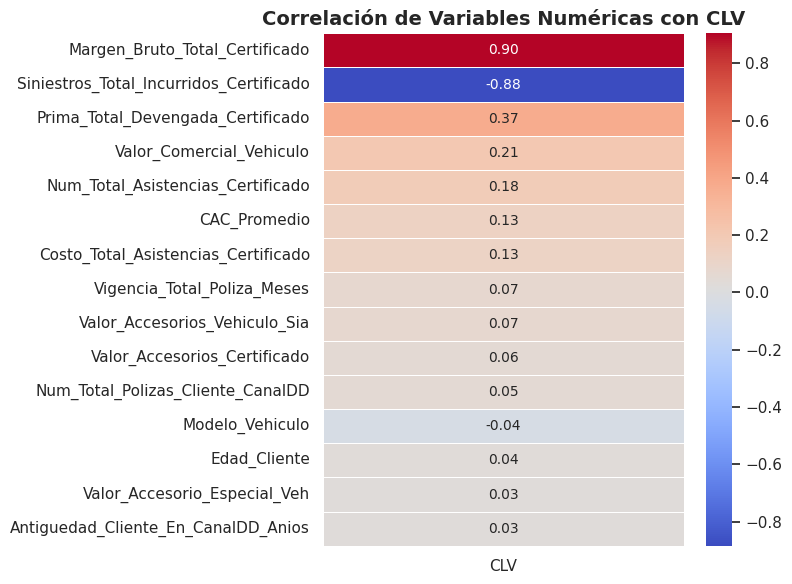

In [497]:
# Selección de variables numéricas (incluye CLV)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular correlación de todas con respecto a 'CLV'
cor_target = numeric_df.corr()['CLV'].drop('CLV')  # Excluir CLV consigo misma

# Ordenar por magnitud
cor_target = cor_target.reindex(cor_target.abs().sort_values(ascending=False).index)

# Visualización tipo barra o heatmap vertical
plt.figure(figsize=(8, 6))
sns.heatmap(cor_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f",
            annot_kws={"size": 10}, linewidths=0.5)

plt.title("Correlación de Variables Numéricas con CLV", fontsize=14, weight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
